# FMCW radar simulation tool

This example diescribes how the FMCW radar simulation tool can be used and aplied. The first task is to initialise all the relevant libraries as follows:

In [1]:
from fmcw_radar import default_77GHz_FMCW_radar
import target_path
import target_detection
import radar_plots
import sys

import numpy as np
import matplotlib.pyplot as plt

## Single radar example

### Settings for the radar

The next step is to determine the radar settings. These settings are based on what can be achieved using a texas instruments FMCW radar (AWR 1843).

In [2]:
# Create radar object
r1 = default_77GHz_FMCW_radar()
r1.set_window(window = 'blackman')
r1.show_parameters()

Maximum unambiguous range: 100.00 m
Maximum unambiguous IF frequency: 20.00 MHz
Maximum unambiguous velocity: 37.96 m/s
Maximum unambiguous angle: 90.00 degrees
SNR: 20 dB at 50 m


### Target position and track

The target is placed, moved around and measured at each defined timeframe. The target can follow numerous predined tracks. During this, plots are shown to illustrate the behavior of the target.

In [3]:
def progress_bar(current, total, bar_length=40):
    progress = current / total
    block = int(bar_length * progress)
    bar = "#" * block + "-" * (bar_length - block)
    sys.stdout.write(f"\r[{bar}] {current}/{total} ({progress * 100:.2f}%)")
    sys.stdout.flush()

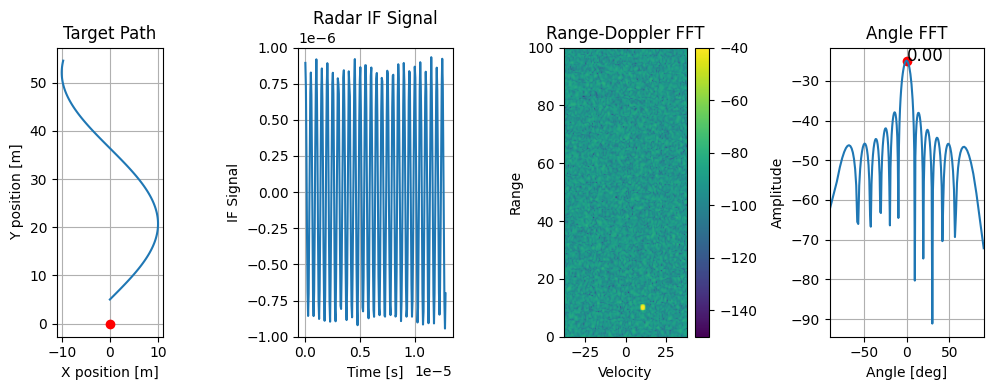

[###########-----------------------------] 35/125 (28.00%)

In [ ]:
Track = target_path.target_path(np.array([[0], [5]]), 10.0, T_tot = 5.0)
Track.generate_trajectory()
X, Y, vX, vY = Track.get_trajectory()

plot = radar_plots.radar_plots(r1, Track)

# Plot to notebook
r1.measure_target(np.array([[0], [10]]), np.array([[0], [10]]))
fig, axes = plt.subplots(1, 4, figsize=(10, 4))
plot.plot_path(ax=axes[0])
plot.plot_radar_IF_signal(ax=axes[1], amplitude_lim=1e-6)
plot.plot_range_doppler_fft(ax=axes[2], amplitude_range=[-150, -40])
plot.plot_angle_fft(ax=axes[3])
plt.tight_layout()
plt.show()

# Plots and tracking for GIF
for point_idx in range(0,len(X)):
    r1.measure_target(np.array([[X[point_idx]], [Y[point_idx]]]), np.array([[vX[point_idx]], [vY[point_idx]]]))
    progress_bar(point_idx+1, len(X), bar_length=40)
    fig, axes = plt.subplots(1, 4, figsize=(10, 4))
    plot.plot_path(ax=axes[0], current_idx=point_idx)
    plot.plot_radar_IF_signal(ax=axes[1], amplitude_lim=1e-6)
    plot.plot_range_doppler_fft(ax=axes[2], amplitude_range=[-150, -50])
    plot.plot_angle_fft(ax=axes[3], amplitude_range=[-100, 0])
    plt.tight_layout()
    plt.savefig('Figures/gif/fig_' + f"{point_idx:05d}" + '.png')
    plt.close(fig)
plot.generate_gif(save_path='Figures/single_radar_track.gif')


## Multi radar example

This example demonstrates how multiple radars can be placed and used for measurements. The demonstrated setup can for instance be used for the MRBLaT algorithm.

In [ ]:
r1 = default_77GHz_FMCW_radar(radar_position = np.array([[-10], [0]]))
r2 = default_77GHz_FMCW_radar(radar_position = np.array([[0], [0]]))
r3 = default_77GHz_FMCW_radar(radar_position = np.array([[10], [0]]))

r1.set_window(window = 'blackman')
r2.set_window(window = 'blackman')
r3.set_window(window = 'blackman')

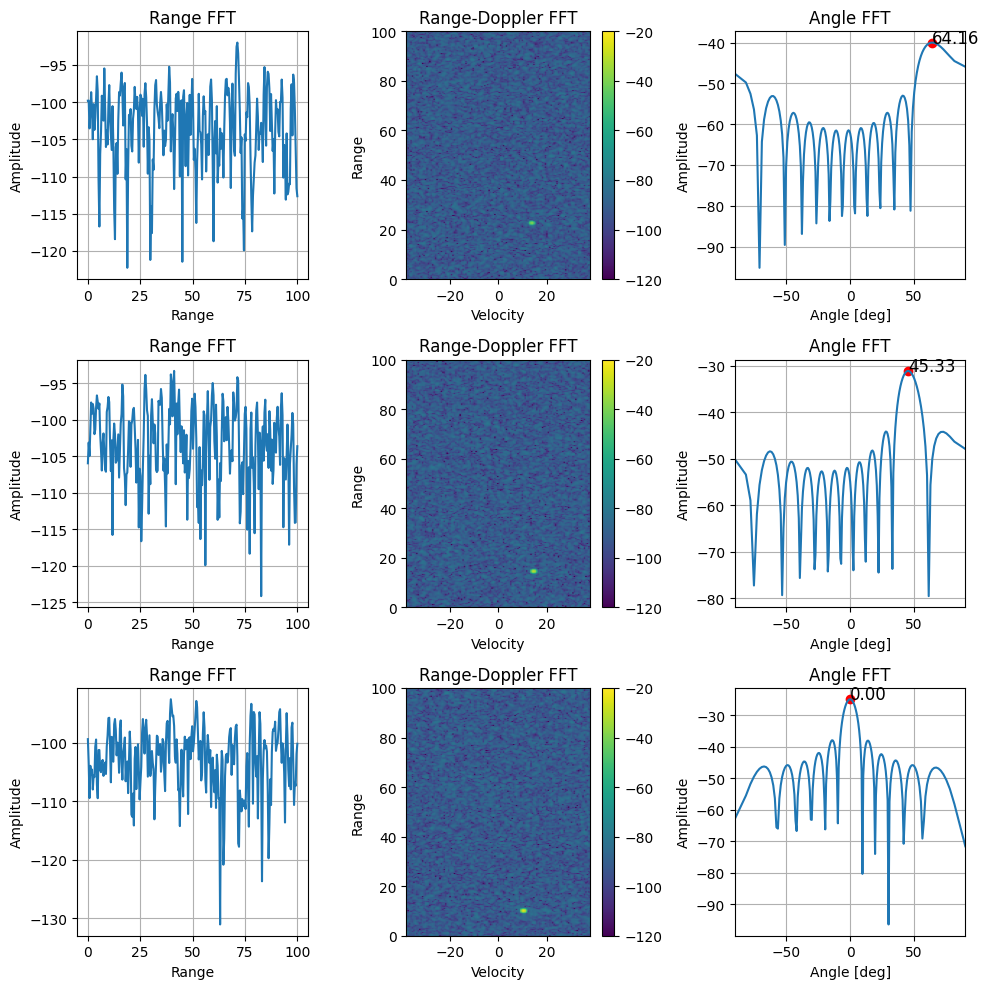

[########################################] 125/125 (100.00%)Gif created and images deleted


0

In [ ]:
plot = radar_plots.radar_plots([r1, r2, r3], Track)

# Plot to notebook
r1.measure_target(np.array([[10], [10]]), np.array([[10], [10]]))
r2.measure_target(np.array([[10], [10]]), np.array([[10], [10]]))
r3.measure_target(np.array([[10], [10]]), np.array([[10], [10]]))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
plot.plot_range_fft(            ax=axes[0,0], radar_idx=0)
plot.plot_range_doppler_fft(    ax=axes[0,1], radar_idx=0, amplitude_range=[-120, -20])
plot.plot_angle_fft(            ax=axes[0,2], radar_idx=0)
plot.plot_range_fft(            ax=axes[1,0], radar_idx=1)
plot.plot_range_doppler_fft(    ax=axes[1,1], radar_idx=1, amplitude_range=[-120, -20])
plot.plot_angle_fft(            ax=axes[1,2], radar_idx=1)
plot.plot_range_fft(            ax=axes[2,0], radar_idx=2)
plot.plot_range_doppler_fft(    ax=axes[2,1], radar_idx=2, amplitude_range=[-120, -20])
plot.plot_angle_fft(            ax=axes[2,2], radar_idx=2)
plt.tight_layout()
plt.show()

# Plots and tracking for GIF
for point_idx in range(0,len(X)):
    r1.measure_target(np.array([[X[point_idx]], [Y[point_idx]]]), np.array([[vX[point_idx]], [vY[point_idx]]]))
    r2.measure_target(np.array([[X[point_idx]], [Y[point_idx]]]), np.array([[vX[point_idx]], [vY[point_idx]]]))
    r3.measure_target(np.array([[X[point_idx]], [Y[point_idx]]]), np.array([[vX[point_idx]], [vY[point_idx]]]))
    progress_bar(point_idx+1, len(X), bar_length=40)
    fig, axes = plt.subplots(3, 4, figsize=(10, 10))
    plot.plot_path(                 ax=axes[0,0], current_idx=point_idx)
    plot.plot_range_fft(            ax=axes[0,1], radar_idx=0, amplitude_range=[-120, -20])
    plot.plot_range_doppler_fft(    ax=axes[0,2], radar_idx=0, amplitude_range=[-120, -20])
    plot.plot_angle_fft(            ax=axes[0,3], radar_idx=0, amplitude_range=[-100, 0])
    plot.plot_range_fft(            ax=axes[1,1], radar_idx=1, amplitude_range=[-120, -20])
    plot.plot_range_doppler_fft(    ax=axes[1,2], radar_idx=1, amplitude_range=[-120, -20])
    plot.plot_angle_fft(            ax=axes[1,3], radar_idx=1, amplitude_range=[-100, 0])
    plot.plot_range_fft(            ax=axes[2,1], radar_idx=2, amplitude_range=[-120, -20])
    plot.plot_range_doppler_fft(    ax=axes[2,2], radar_idx=2, amplitude_range=[-120, -20])
    plot.plot_angle_fft(            ax=axes[2,3], radar_idx=2, amplitude_range=[-100, 0])
    axes[1,0] = None
    axes[2,0] = None
    plt.tight_layout()
    plt.savefig('Figures/gif/fig_' + f"{point_idx:05d}" + '.png')
    plt.close(fig)
plot.generate_gif(save_path='Figures/three_radar_track.gif')